<a href="https://colab.research.google.com/github/swayista/MOVIE-RECOMMENDATION-/blob/main/Movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('tmdb_5000_movies.csv')
df2 = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
df1.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df2.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df2.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [6]:
df1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
df2 =df2.rename(columns= {"movie_id":"id"})

In [8]:
df2.head(5)

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
df1.shape


(4803, 20)

In [10]:
df2.shape

(4803, 4)

In [11]:
df= df1.merge(df2, on='id')

In [12]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
df.shape

(4803, 23)

In [14]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [15]:
df.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]","He didn't come looking for trouble, but troubl...",6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],2011-12-26,0,85.0,[],A newlywed couple's honeymoon is upended by th...,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}..."

In [16]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


To build a weighted average recommendation system

In [17]:
v= df['vote_count']
R= df['vote_average']
C= df['vote_average'].mean()


In [18]:
C

np.float64(6.092171559442016)

In [19]:
df[['original_title', 'vote_count']]

,original_title,vote_count
0,Avatar,11800
1,Pirates of the Caribbean: At World's End,4500
2,Spectre,4466
3,The Dark Knight Rises,9106
4,John Carter,2124
...,...,...
4798,El Mariachi,238
4799,Newlyweds,5
4800,"Signed, Sealed, Delivered",6
4801,Shanghai Calling,7


<Axes: xlabel='vote_count'>

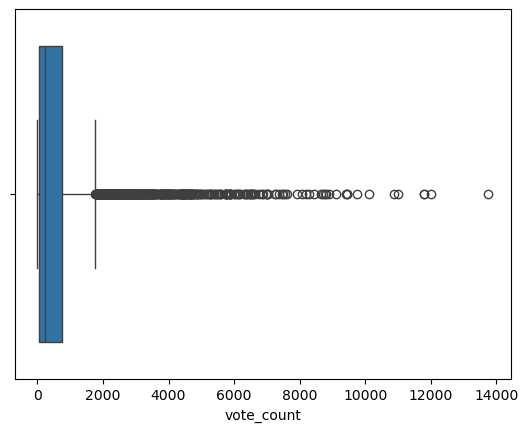

In [20]:
sns.boxplot(data=df, x='vote_count')

In [21]:
threshold= df['vote_count'].quantile(q=0.9)

In [22]:
df['vote_count'].quantile(q=0.92)

np.float64(2231.720000000001)

In [23]:
df['vote_count']>=threshold

0        True
1        True
2        True
3        True
4        True
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Name: vote_count, Length: 4803, dtype: bool

In [24]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{

In [25]:
v

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

In [26]:
R

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

In [27]:
m= threshold

In [28]:
df['weighted_average']= ((R*v)+(C*m))/(v+m)

In [29]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368


In [30]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew', 'weighted_average'],
      dtype='object')

Considering weighted average the top movies will get recommended the most.

In [31]:
df_rank= df.sort_values('weighted_average', ascending=False)

In [32]:
df_rank.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew', 'weighted_average'],
      dtype='object')

In [33]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

<Axes: xlabel='original_title', ylabel='weighted_average'>

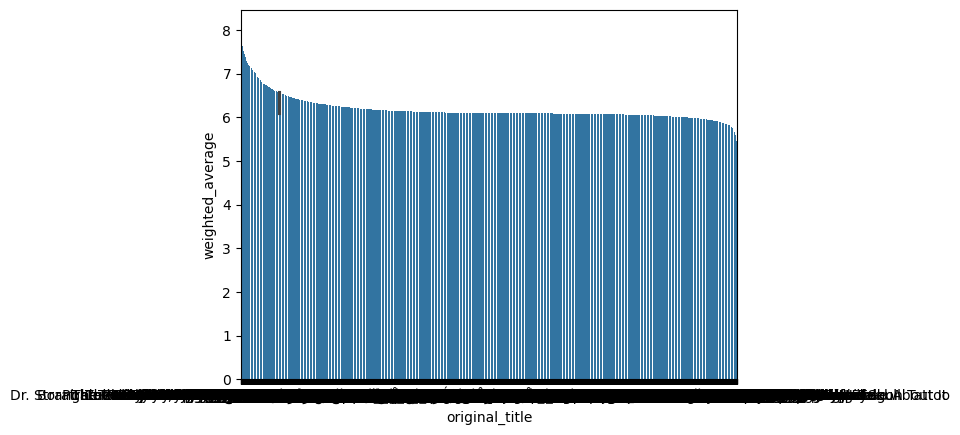

In [34]:
sns.barplot(data=df_rank, x='original_title', y='weighted_average')

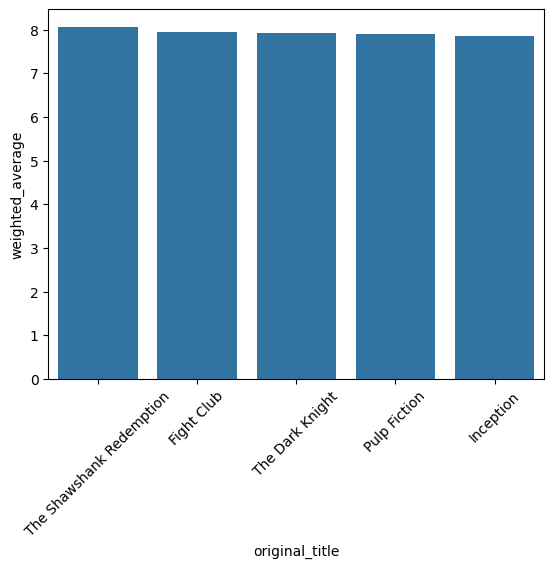

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only 10 rows
df_top10 = df_rank.head(5)   # first 10 rows
# df_top10 = df_rank.sample(10)  # random 10 rows
# df_top10 = df_rank.nlargest(10, 'weighted_average')  # top 10 by weighted_average

sns.barplot(data=df_top10, x='original_title', y='weighted_average')
plt.xticks(rotation=45)  # optional, rotate labels if long
plt.show()


if warning occurs execute the above set of code

Popularity based recommendation system

In [36]:
popularity_df= df_rank.sort_values('popularity', ascending = False)

In [37]:
popularity_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,weighted_average
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.311706
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.809479
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",7.212652
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,Guardians of the Galaxy,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",7.613005
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",7.019214


In [38]:
popularity_df.set_index('original_title')['popularity'].head(10)

original_title
Minions                                                   875.581305
Interstellar                                              724.247784
Deadpool                                                  514.569956
Guardians of the Galaxy                                   481.098624
Mad Max: Fury Road                                        434.278564
Jurassic World                                            418.708552
Pirates of the Caribbean: The Curse of the Black Pearl    271.972889
Dawn of the Planet of the Apes                            243.791743
The Hunger Games: Mockingjay - Part 1                     206.227151
Big Hero 6                                                203.734590
Name: popularity, dtype: float64

If we want to build a hybrid model we have to normalize the data, because the scope of the data of popularity and weighted average is different, one spans from 1-10 and other spans from 1-1000

In [39]:
df_rank.shape

(4803, 24)

In [40]:
df_rank[['popularity', 'weighted_average']][0:5]#or you van use head(5)

,popularity,weighted_average
1881,136.747729,8.059258
662,146.757391,7.939256
65,187.322927,7.920020
3232,121.463076,7.904645
96,167.583710,7.863239


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaling= MinMaxScaler()
scaling_values= scaling.fit_transform(df_rank[['popularity', 'weighted_average']])

In [42]:
df_rank[['popularity_scaled', 'weighted_average_scaled']]= scaling_values

In [43]:
df_rank.shape

(4803, 26)

In [44]:
df_rank['score_mix']= df_rank['popularity_scaled']*0.5 + df_rank['weighted_average_scaled']*0.5

In [45]:
df_rank.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title_x,vote_average,vote_count,title_y,cast,crew,weighted_average,popularity_scaled,weighted_average_scaled,score_mix
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258,0.156179,1.000000,0.578090
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,Fight Club,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256,0.167611,0.958670,0.563141
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,The Dark Knight,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020,0.213941,0.952045,0.582993
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,Pulp Fiction,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645,0.138723,0.946750,0.542736
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Inception,8.1,13752,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239,0.191397,0.932490,0.561943


In [46]:
rank_df= df_rank.sort_values('score_mix', ascending=False)

<BarContainer object of 4803 artists>

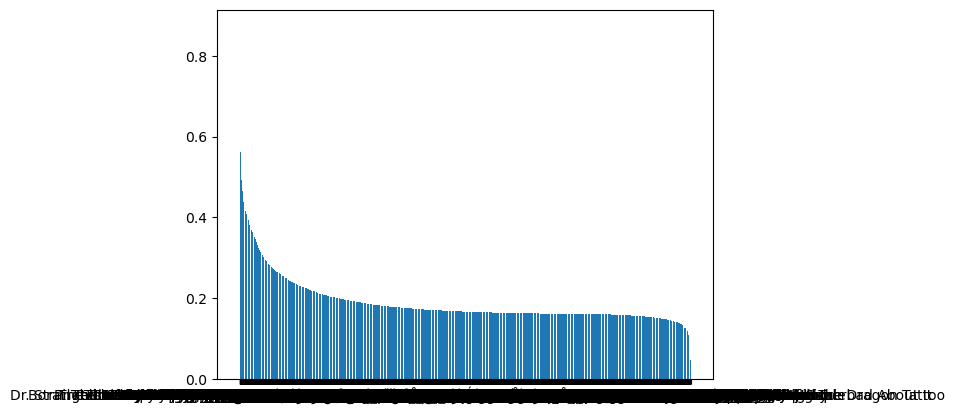

In [47]:
import matplotlib.pyplot as plt
plt.bar(data=rank_df, x='original_title', height='score_mix')

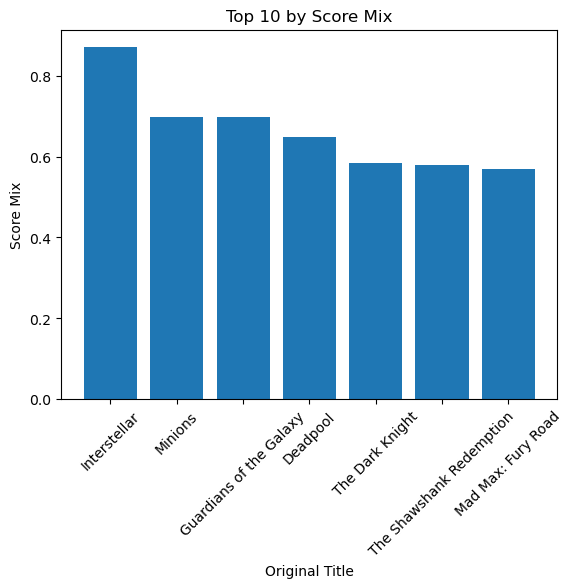

In [48]:
import matplotlib.pyplot as plt

# keep only top 10 rows (by score_mix)
top10 = rank_df.nlargest(7, 'score_mix')

plt.bar(top10['original_title'], top10['score_mix'])
plt.xticks(rotation=45)   # rotate x labels if they are long
plt.ylabel("Score Mix")
plt.xlabel("Original Title")
plt.title("Top 10 by Score Mix")
plt.show()


Next learn how to create content based recommendation system and deploy it in streamlit

In [49]:
df_rank.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew', 'weighted_average',
       'popularity_scaled', 'weighted_average_scaled', 'score_mix'],
      dtype='object')

In [50]:
df_rank['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [51]:
df_rank['overview'].isnull().sum()

np.int64(3)

In [52]:
df_rank[df_rank['overview'].isnull()].head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title_x,vote_average,vote_count,title_y,cast,crew,weighted_average,popularity_scaled,weighted_average_scaled,score_mix
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,Chiamatemi Francesco - Il Papa della gente,7.3,12,Chiamatemi Francesco - Il Papa della gente,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",6.100004,0.000844,0.325216,0.163030
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],...,Food Chains,7.4,8,Food Chains,[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de...",6.097838,0.000909,0.324470,0.162689
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,"To Be Frank, Sinatra at 100",0.0,0,"To Be Frank, Sinatra at 100","[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",6.092172,0.000058,0.322518,0.161288


In [53]:
df_rank = df_rank.dropna(subset=['overview'])

In [54]:
df_rank['overview'].isnull().sum()

np.int64(0)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfv= TfidfVectorizer(min_df=3, max_features=None,
                      ngram_range=(1,3),
                      stop_words='english')

In [57]:
tfv_matrix= tfv.fit_transform(df_rank['overview'])

In [58]:
tfv_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 121480 stored elements and shape (4800, 9919)>

In [59]:
tfv_matrix.shape

(4800, 9919)

In [60]:
tfv_matrix.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.], shape=(9919,))

In [61]:
pd.DataFrame(tfv_matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,...,9909,9910,9911,9912,9913,9914,9915,9916,9917,9918
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So, we already have the tf-idf matrix we have to send  to the sigmoid kernel so that we can compute a similarity score.

In [62]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [63]:
sig= sigmoid_kernel(tfv_matrix, tfv_matrix)

In [64]:
sig

array([[0.76163649, 0.7615945 , 0.76159416, ..., 0.76159416, 0.76159445,
        0.76159536],
       [0.7615945 , 0.76163649, 0.76159416, ..., 0.76159416, 0.76159445,
        0.7615975 ],
       [0.76159416, 0.76159416, 0.76163649, ..., 0.76159487, 0.76159849,
        0.76159416],
       ...,
       [0.76159416, 0.76159416, 0.76159487, ..., 0.76163649, 0.76159416,
        0.76159569],
       [0.76159445, 0.76159445, 0.76159849, ..., 0.76159416, 0.76163649,
        0.76159448],
       [0.76159536, 0.7615975 , 0.76159416, ..., 0.76159569, 0.76159448,
        0.76163649]], shape=(4800, 4800))

In [65]:
pd.DataFrame(sig)

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
0,0.761636,0.761595,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761596,0.761594,0.761595,0.761594,0.761594,0.761594,0.761594,0.761595
1,0.761595,0.761636,0.761594,0.761595,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761595,0.761595,0.761595,0.761594,0.761594,0.761594,0.761598
2,0.761594,0.761594,0.761636,0.761595,0.761594,0.761595,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761595,0.761594,0.761595,0.761594,0.761595,0.761598,0.761594
3,0.761594,0.761595,0.761595,0.761636,0.761594,0.761596,0.761596,0.761595,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761595,0.761594,0.761595,0.761594,0.761595,0.761596,0.761594
4,0.761594,0.761594,0.761594,0.761594,0.761636,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761596,0.761594,0.761596,0.761594,0.761594,0.761594,0.761594,0.761594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.761594,0.761595,0.761595,0.761595,0.761594,0.761595,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761595,0.761594,0.761596,0.761595,0.761636,0.761594,0.761594,0.761594,0.761595
4796,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761595,0.761594,...,0.761594,0.761596,0.761594,0.761594,0.761595,0.761594,0.761636,0.761594,0.761594,0.761595
4797,0.761594,0.761594,0.761595,0.761595,0.761594,0.761594,0.761594,0.761595,0.761594,0.761594,...,0.761596,0.761594,0.761594,0.761594,0.761595,0.761594,0.761594,0.761636,0.761594,0.761596
4798,0.761594,0.761594,0.761598,0.761596,0.761594,0.761595,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761636,0.761594


In [66]:
df_rank['original_title']

1881        The Shawshank Redemption
662                       Fight Club
65                   The Dark Knight
3232                    Pulp Fiction
96                         Inception
                    ...             
1652            Dragonball Evolution
91      Independence Day: Resurgence
3746               The Boy Next Door
210                   Batman & Robin
242                   Fantastic Four
Name: original_title, Length: 4800, dtype: object

In [67]:
df_rank.index

Index([1881,  662,   65, 3232,   96, 3337,   95,  809,  329, 1990,
       ...
       1154,   41,  303,  337,  193, 1652,   91, 3746,  210,  242],
      dtype='int64', length=4800)

In [68]:
indices= pd.Series(data= df_rank.index, index=df_rank['original_title'])

In [69]:
indices

original_title
The Shawshank Redemption        1881
Fight Club                       662
The Dark Knight                   65
Pulp Fiction                    3232
Inception                         96
                                ... 
Dragonball Evolution            1652
Independence Day: Resurgence      91
The Boy Next Door               3746
Batman & Robin                   210
Fantastic Four                   242
Length: 4800, dtype: int64

In [70]:
indices['John Carter']

np.int64(4)

In [71]:
sig[4]

array([0.7615945 , 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416], shape=(4800,))

In [72]:
list(enumerate(sig[indices['John Carter']]))

[(0, np.float64(0.7615944968525631)),
 (1, np.float64(0.7615941559557649)),
 (2, np.float64(0.7615941559557649)),
 (3, np.float64(0.7615941559557649)),
 (4, np.float64(0.7616364930962501)),
 (5, np.float64(0.7615944180609707)),
 (6, np.float64(0.7615941559557649)),
 (7, np.float64(0.7615944811559611)),
 (8, np.float64(0.7615941559557649)),
 (9, np.float64(0.7615941559557649)),
 (10, np.float64(0.7615941559557649)),
 (11, np.float64(0.7615941559557649)),
 (12, np.float64(0.7615941559557649)),
 (13, np.float64(0.7615941559557649)),
 (14, np.float64(0.7615941559557649)),
 (15, np.float64(0.7615941559557649)),
 (16, np.float64(0.7615962811809425)),
 (17, np.float64(0.7615941559557649)),
 (18, np.float64(0.761594807438791)),
 (19, np.float64(0.7615946624726346)),
 (20, np.float64(0.7615941559557649)),
 (21, np.float64(0.7615941559557649)),
 (22, np.float64(0.7615941559557649)),
 (23, np.float64(0.7615944899865499)),
 (24, np.float64(0.7615941559557649)),
 (25, np.float64(0.7615941559557649)

In [73]:
sigma= sorted(list(enumerate(sig[indices['John Carter']])), key= lambda x:x[1], reverse=True)

In [74]:
sigma[0:10]

[(4, np.float64(0.7616364930962501)),
 (1903, np.float64(0.7616013274185821)),
 (1508, np.float64(0.7616012119192527)),
 (497, np.float64(0.76159935829461)),
 (246, np.float64(0.7615990527545704)),
 (3206, np.float64(0.7615988311711273)),
 (3265, np.float64(0.761598785843427)),
 (185, np.float64(0.7615983811022229)),
 (3120, np.float64(0.7615982335017129)),
 (1565, np.float64(0.76159819614839))]

In [75]:
ind= [i[0] for i in sigma[0:10]]

In [76]:
ind

[4, 1903, 1508, 497, 246, 3206, 3265, 185, 3120, 1565]

In [77]:
df_rank['original_title'][ind]

4                 John Carter
1903                The Ruins
1508            The Number 23
497                Red Dragon
246               The Patriot
3206                  Polisse
3265    Shadow of the Vampire
185         War of the Worlds
3120             Strangerland
1565            Up in the Air
Name: original_title, dtype: object

so, ofr someone watching John Carter we can suggest all teh movies shown below the carter

In [78]:
df_rank

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title_x,vote_average,vote_count,title_y,cast,crew,weighted_average,popularity_scaled,weighted_average_scaled,score_mix
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258,0.156179,1.000000,0.578090
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,Fight Club,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256,0.167611,0.958670,0.563141
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,The Dark Knight,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020,0.213941,0.952045,0.582993
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,Pulp Fiction,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645,0.138723,0.946750,0.542736
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Inception,8.1,13752,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239,0.191397,0.932490,0.561943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,14164,"[{""id"": 3436, ""name"": ""karate""}, {""id"": 9715, ...",en,Dragonball Evolution,The young warrior Son Goku sets out on a quest...,21.677732,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Dragonball Evolution,2.9,462,Dragonball Evolution,"[{""cast_id"": 17, ""character"": ""Master Roshi"", ...","[{""credit_id"": ""52fe45d29251416c75063b05"", ""de...",5.451073,0.024758,0.101719,0.063238
91,165000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.warof1996.com,47933,"[{""id"": 12026, ""name"": ""alternate history""}, {...",en,Independence Day: Resurgence,We always knew they were coming back. Using re...,48.775723,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,Independence Day: Resurgence,4.9,2491,Independence Day: Resurgence,"[{""cast_id"": 5, ""character"": ""Jake Morrison"", ...","[{""credit_id"": ""5763d39cc3a36860a5000168"", ""de...",5.406234,0.055707,0.086276,0.070991
3746,4000000,"[{""id"": 53, ""name"": ""Thriller""}]",http://www.theboynextdoorfilm.com/,241251,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...",en,The Boy Next Door,A

In [79]:
def give_recommendation(movie_title, model):
  indices= pd.Series(data= df_rank.index, index=df_rank['original_title'])
  idx= indices[movie_title]
  model_scores= list(enumerate(model[idx]))
  model_scores_sorted= sorted(model_scores, key= lambda x:x[1], reverse=True)
  model_scores_10= model_scores[0:11]
  movie_indices_10= [i[0] for i in model_scores_10]
  return df_rank['original_title'][movie_indices_10]

In [80]:
give_recommendation('Avatar', sig)

0                                       Avatar
1     Pirates of the Caribbean: At World's End
2                                      Spectre
3                        The Dark Knight Rises
4                                  John Carter
5                                 Spider-Man 3
6                                      Tangled
7                      Avengers: Age of Ultron
8       Harry Potter and the Half-Blood Prince
9           Batman v Superman: Dawn of Justice
10                            Superman Returns
Name: original_title, dtype: object

In [81]:
import pickle

pickle.dump(df_rank.to_dict(), open('movies_dict.pkl', 'wb'))
pickle.dump(sig, open('similarity.pkl', 'wb'))  # saving sig as similarity.pkl
